In [1]:
# Time series

In [2]:
## General topics in Financial Analytics

### Logarithmic Rate of Returns
### Options
### Arch
### Garchl
### Arima

In [16]:
# This command will activate multiline output [you could also use display()]
from IPython.core.interactiveshell import Interactiveshell

ImportError: cannot import name 'interactiveshell' from 'IPython.core.interactiveshell' (/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py)

In [5]:
# Import needed libraries
import scipy as sp
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [12]:
# Set begin & end dates with Datetime
start = datetime(2018,7,22)
end = datetime(2019,7,27)

In [13]:
INTC = web.DataReader('INTC', data_source='yahoo',start=start, end=end)

### Logarithmic Rate of Returns
$$
Ln(\frac{End Price}{Begining Price})
$$

In [14]:
# Understanding Log returns 
np.log(1.5) # Log of 1.5 gives Log return for that period, treats as 1.5 as principal (1) + interest(0.5).
np.exp(0.405) # shows that Log was taken to natural base e.
# other options for Log: Log2, Log10, Log1p
print('=================== log_10')
np.log10(1.5); 10**0.1760912591;
print('=================== log_2')
np.log2(1.5); 2**0.58496250072;
print('=================== log_1p, more complex than appears, read help')

=================== log_10
=================== log_2
=================== log_1p, more complex than appears, read help


In [17]:
INTC['log_return'] = np.log(INTC['Adj Close'] / INTC['Adj Close'].shift(1))
print (INTC['log_return'])

Date
2018-07-23         NaN
2018-07-24   -0.002488
2018-07-25    0.004780
2018-07-26   -0.005163
2018-07-27   -0.089804
2018-07-30    0.000210
2018-07-31    0.008560
2018-08-01    0.014653
2018-08-02    0.013633
2018-08-03    0.003027
2018-08-06   -0.000608
2018-08-07    0.008081
2018-08-08    0.005218
2018-08-09    0.003596
2018-08-10   -0.026065
2018-08-13   -0.008222
2018-08-14   -0.006834
2018-08-15   -0.013811
2018-08-16   -0.006129
2018-08-17   -0.001485
2018-08-20   -0.012821
2018-08-21    0.023801
2018-08-22   -0.012042
2018-08-23   -0.001489
2018-08-24    0.014371
2018-08-27    0.014374
2018-08-28    0.004540
2018-08-29    0.003699
2018-08-30   -0.010517
2018-08-31    0.003931
                ...   
2019-06-14   -0.010981
2019-06-17   -0.001300
2019-06-18    0.026526
2019-06-19   -0.006353
2019-06-20    0.002546
2019-06-21    0.005705
2019-06-24    0.003576
2019-06-25   -0.016512
2019-06-26    0.028201
2019-06-27   -0.015264
2019-06-28    0.008602
2019-07-01    0.003753
2019-0

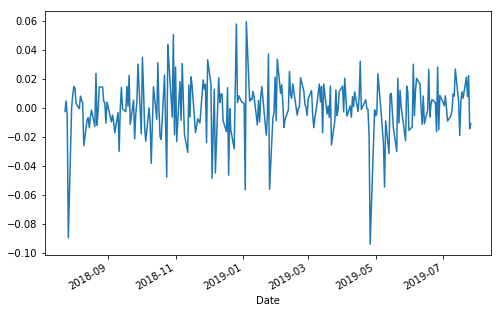

================================== log_return mean
================================== log_return annual, assuming 252 trading days
================================== log_return annual rounded as %
1.082 %


In [18]:
INTC['log_return'].plot(figsize=(8,5))
plt.show();
print("================================== log_return mean")
log_return_d = INTC['log_return'].mean()
log_return_d
print("================================== log_return annual, assuming 252 trading days")
log_return_a = INTC['log_return'].mean() * 252
log_return_a
print("================================== log_return annual rounded as %")
print (str(round(log_return_a, 5)* 100) + ' %')

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('walmart_stock.csv')

In [22]:
df.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.set_index('Date', inplace=True)

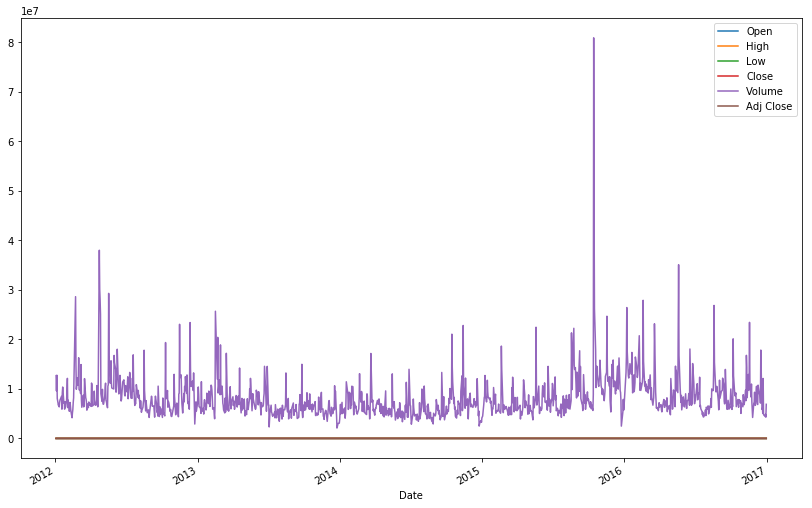

In [32]:
df.plot(figsize=(14,9));

In [33]:
timeseries = df['Open']

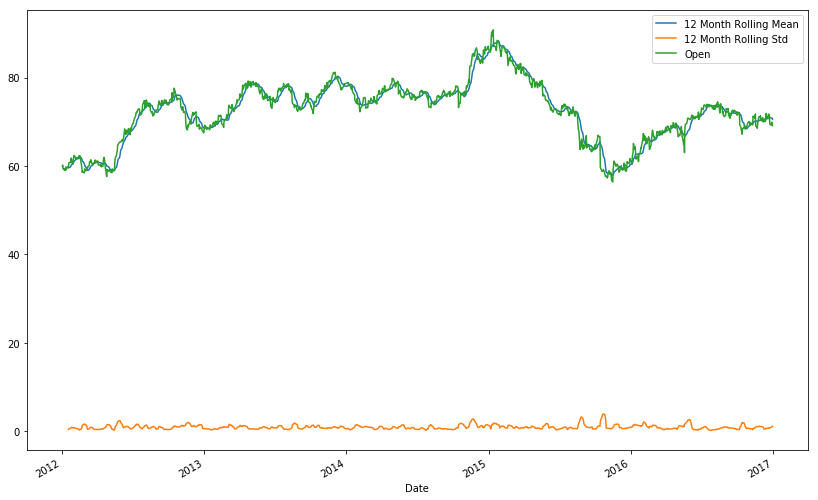

In [34]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean');
timeseries.rolling(12).std().plot(label='12 Month Rolling Std');
timeseries.plot(figsize=(14,9));
plt.legend();

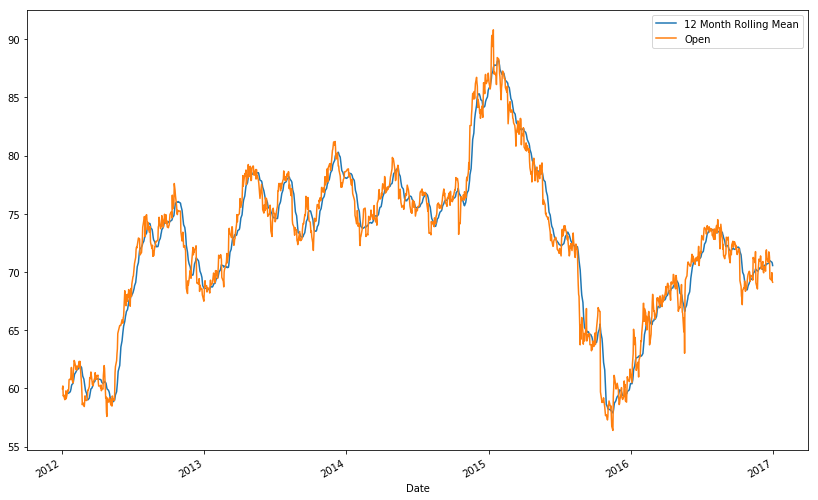

In [35]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean');
timeseries.plot(figsize=(14,9));
plt.legend();

<Figure size 432x288 with 0 Axes>

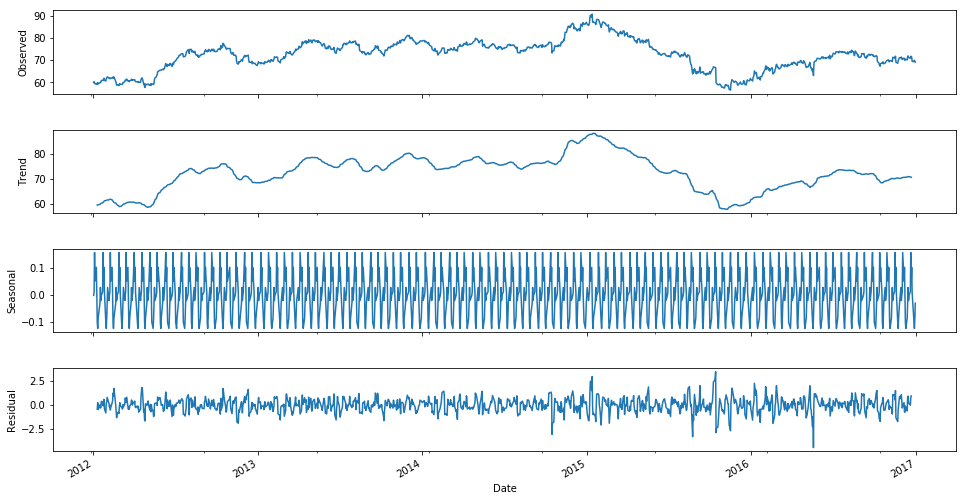

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

# Dicky Fuller Test

In [43]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, return ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    
    for value, label in zip(result,labels):
        print(label+' : '+str(value) )
        
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis, reject the null hypotheiss. Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
adf_check(df['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3151731491483036
p-value : 0.1671210162134712
#Lags Used : 11
Number of Observations Used : 1246
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
